# Online Deterministic Annealing (ODA) for Classification

> A general-purpose learning model designed to meet the needs of applications in which computational resources are limited, and robustness and interpretability are prioritized.

> Constitutes an **online** prototype-based learning algorithm based on annealing optimization that is formulated as an recursive **gradient-free** stochastic approximation algorithm.

> Can be viewed as an interpretable and progressively growing competitive-learning neural network model.

> Christos Mavridis (<mavridis@umd.edu>)

In [1]:
%matplotlib inline
from IPython.display import HTML

# Toggle on/off the raw code
# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off the raw code."></form>''')

## Import Modules

In [2]:
import pickle
import numpy as np

import os
import sys
sys.path.append('../OnlineDeterministicAnnealing/')
sys.path.append('../tests/demo')

from oda import ODA 
import demo_domain

# For Plotting Figures horizontally
import matplotlib.pyplot as plt
import io
import base64
class FlowLayout(object):
    ''' A class / object to display plots in a horizontal / flow layout below a cell '''
    def __init__(self):
        # string buffer for the HTML: initially some CSS; images to be appended
        self.sHtml =  """
        <style>
        .floating-box {
        display: inline-block;
        margin: 10px;
        border: 3px solid #888888;  
        }
        </style>
        """

    def add_plot(self, oAxes):
        ''' Saves a PNG representation of a Matplotlib Axes object '''
        Bio=io.BytesIO() # bytes buffer for the plot
        fig = oAxes.get_figure()
        fig.canvas.print_png(Bio) # make a png of the plot in the buffer

        # encode the bytes as string using base 64 
        sB64Img = base64.b64encode(Bio.getvalue()).decode()
        self.sHtml+= (
            '<div class="floating-box">'+ 
            '<img src="data:image/png;base64,{}\n">'.format(sB64Img)+
            '</div>')

    def PassHtmlToCell(self):
        ''' Final step - display the accumulated HTML '''
        display(HTML(self.sHtml))

print('*** ODA Class Imported ***')

*** ODA Class Imported ***


## Load Data

Training Data Format: [[array([0.70373002, 0.291594  ])], ..., [array([0.80671487, 0.61023186])]]
Training Labels Format: [1, ..., 0]



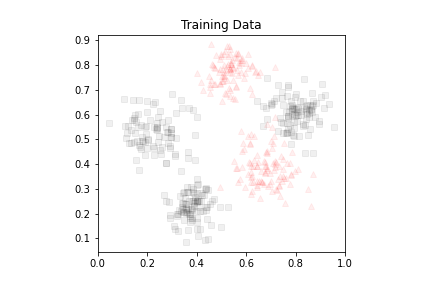
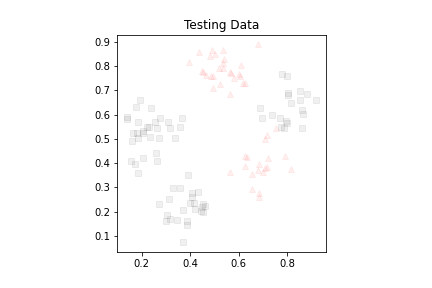

In [3]:
data_file = 'data'

with open(data_file+'.pkl', mode='rb') as file:
    train_data,train_labels,test_data,test_labels = pickle.load(file)

train_data = [[td[1]] for td in train_data]
test_data = [[td[1]] for td in test_data]

print(f'Training Data Format: [{train_data[0]}, ..., {train_data[-1]}]')
print(f'Training Labels Format: [{train_labels[0]}, ..., {train_labels[-1]}]')

oPlot = FlowLayout()
ax = demo_domain.show_data(train_data,train_labels,plot_fig=False,save_fig = False, title='Training Data')
oPlot.add_plot(ax)
ax = demo_domain.show_data(test_data,test_labels,plot_fig=False,save_fig = False, title='Testing Data')
oPlot.add_plot(ax)
oPlot.PassHtmlToCell()

## Load or Initialize Model

*** ODA Model Initialized ***



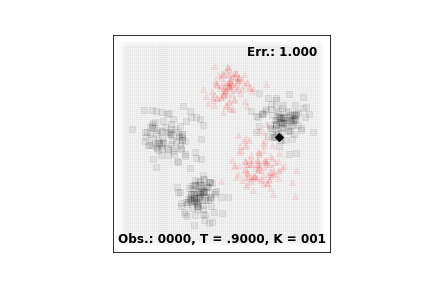

(Ignore zero accuracy text in the top right corner. It is just not quantified during initialization.)


In [4]:
load_file = ''

# Load Existing ODA Model
if len(load_file)>0:

    with open(load_file+'.pkl', mode='rb') as file:
        clf = pickle.load(file)

    clf.load()

# Initialize ODA    
else:
    
    clf = ODA(train_data=train_data,train_labels=train_labels)

print('*** ODA Model Initialized ***')
oPlot = FlowLayout()
ax = demo_domain.show_instance(clf=clf, instance=0, res=[1], plot_fig=False,save_fig = False)
oPlot.add_plot(ax)
oPlot.PassHtmlToCell()
print('(Ignore zero accuracy text in the top right corner. It is just not quantified during initialization.)')

## Fit Model

In [5]:
print('*** ODA ***')

clf.fit(test_data=test_data,test_labels=test_labels)

print('*** ODA ***')
accuTrain = 1-clf.score(train_data, train_labels)
accuTest = 1-clf.score(test_data, test_labels)
print(f'Train Accuracy: {accuTrain}') 
print(f'Test Accuracy: {accuTest}')    
print(f'Running time: {np.sum(clf.myTime):.1f}s')

*** ODA ***
2 -- ID: [0]: Samples: 6(+6): T = 0.9000, K = 2, treeK = 2, [+0.9s]
Train Error: 0.4208
Test Error: 0.3917
3 -- ID: [0]: Samples: 62(+56): T = 0.0900, K = 2, treeK = 2, [+0.0s]
Train Error: 0.4042
Test Error: 0.3000
4 -- ID: [0]: Samples: 124(+62): T = 0.0450, K = 4, treeK = 4, [+0.0s]
Train Error: 0.0187
Test Error: 0.0083
5 -- ID: [0]: Samples: 190(+66): T = 0.0360, K = 4, treeK = 4, [+0.0s]
Train Error: 0.0375
Test Error: 0.0250
6 -- ID: [0]: Samples: 235(+45): T = 0.0288, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0167
Test Error: 0.0083
7 -- ID: [0]: Samples: 281(+46): T = 0.0230, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0229
Test Error: 0.0250
8 -- ID: [0]: Samples: 333(+52): T = 0.0184, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0125
Test Error: 0.0083
9 -- ID: [0]: Samples: 401(+68): T = 0.0147, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0167
Test Error: 0.0167
10 -- ID: [0]: Samples: 489(+88): T = 0.0118, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0292
Test Error: 0.0250
1

## Plot Training Curve


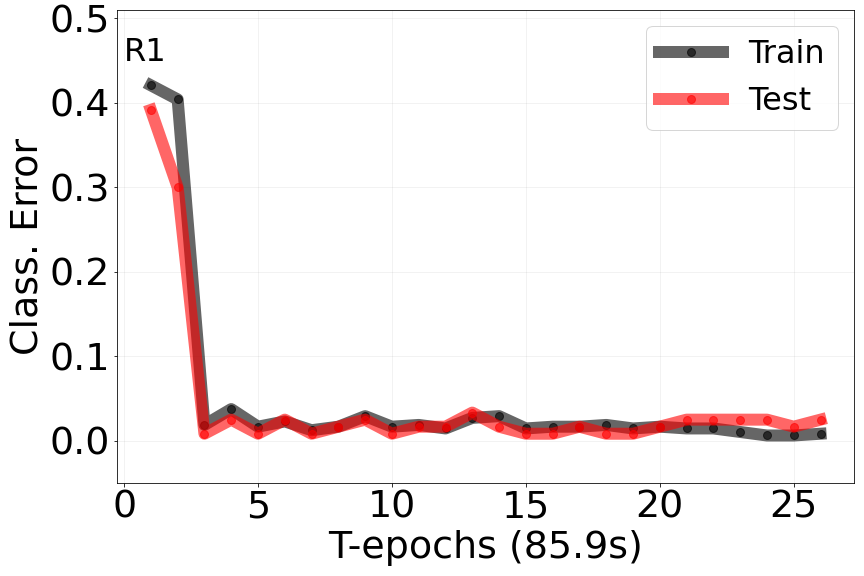

In [6]:
plot_curves = True

if clf.keepscore>1 and plot_curves:
    oPlot = FlowLayout()
    ax = clf.plot_curve('.', show = False, save = False)
    oPlot.add_plot(ax)
    oPlot.PassHtmlToCell()

## Show Domain

*** Plotting Domain ***



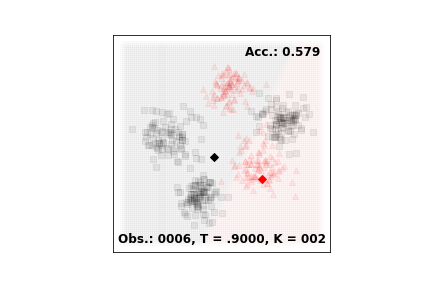
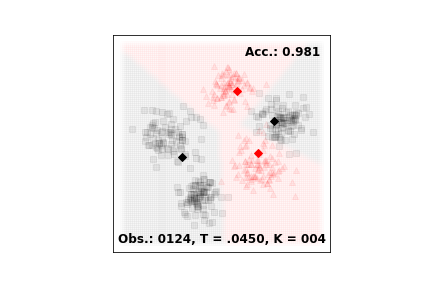
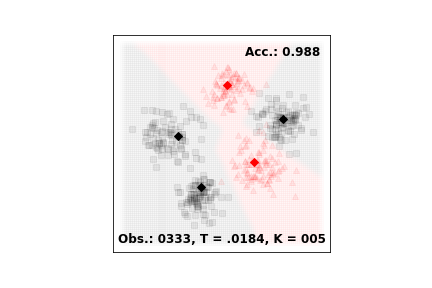
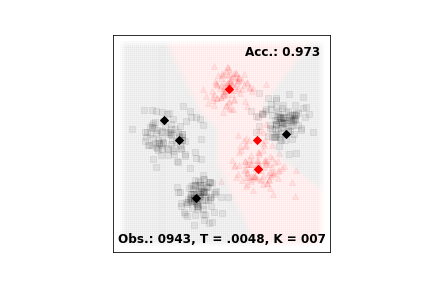
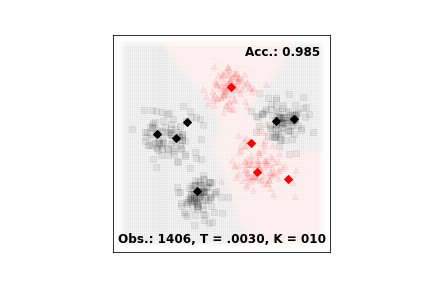
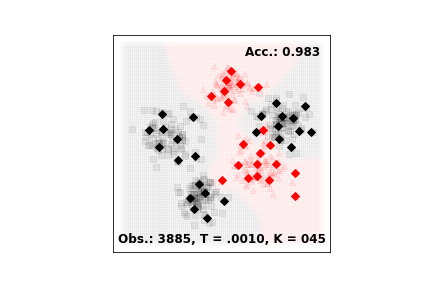
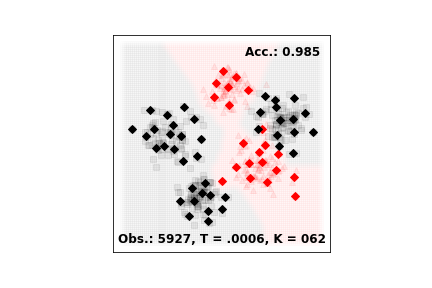
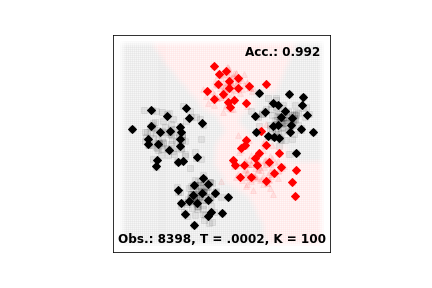

*** All Done ***


In [7]:
show_domain = True
res = [1]

if show_domain:
    print('*** Plotting Domain ***')
    if len(res)<2:
        oPlot = FlowLayout()
        for i in [1,3,7,13,15,20,22,26]:
            ax = demo_domain.show_instance(clf=clf, instance = i, res=res, plot_fig=False, save_fig = False)
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
    else:
        axs = demo_domain.show_resolutions(clf=clf, res=res, plot_fig=False, save_fig = False)
        oPlot = FlowLayout()
        for ax in axs:
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
        
print('*** All Done ***')

# Takeaways:

## [1] In less than 0.1s and using K=5 codevectors
- Training Error = 1.65%
- Testing Error = 0.85% 
### but 
- to reach 1% Training Error we need ~70s and ~70 codevectors
- Codevectors are used for class-conditioned density estimation.
### However 
- this results in 1.67% (increased) Testing Error: Overfitting VS Generalization

## [2] Trade-off between Performance and Complexity
## [3] Do we need to populate homogeneous regions? Can we just focus on the boundaries? 
- See Tree-Structured Version below

## [4] Can we alleviate quadratic complexity $O(K^2)$? 
- See Tree-Structured Version below

## Cost Function (Bregman Divergence)

In [8]:
# Bregman Divergence: Values in {'phi_Eucl', 'phi_KL'} (Squared Euclidean distance, KL divergence)
Bregman_phi = ['phi_Eucl'] 

## Termination Criteria

In [9]:
# Minimum Termperature 
Tmin = [1e-4]

# Limit in node's children. After that stop growing
Kmax = [100]
# Limit in the number of convergent representations. (Developer Mode) 
timeline_limit = 1e3
# Desired training error. 
error_threshold = [0.01]
# Stop when reached 'error_threshold_count' times
error_threshold_count = [2]

# ODA vs Soft-Clustering vs LVQ
# Values in {0,1,2,3}
# 0:ODA update
# 1:ODA until Kmax. Then switch to 2:soft clustering with no perturbation/merging 
# 2:soft clustering with no perturbation/merging 
# 3: LVQ update (hard-clustering) with no perturbation/merging
lvq=[0]

## Comments on Termination Criteria

> These are predefined termination criteria.

> Most of them do not require feedback (error calculation with respect to some dataset).

> This is reminiscent of genetic algorithms.

> Adaptive termination criteria with respect to feedback (e.g., relative change to error) can also be implemented.

> For an application-specific extension please contact the author.

## Advanced Parameters (Developer Mode)

### Temperature Schedule

In [10]:
# lambda max values in [0,1]. T = (1-lambda)/lambda
Tmax = [0.9]

# T' = gamma * T
gamma_steady = [0.8] 
# Initial updates can be set to reduce faster
gamma_schedule = [[0.1,0.5]]

### Regularization

In [11]:
# Perturb (dublicate) existing codevectors 
# Parameter delta = d_phi(mu, mu+'delta')/T: 
perturb_param = [1e-1]
# Threshold to find merged (effective) codevectors
# Parameter e_n = d_phi(mu, mu+'effective_neighborhood')/T
effective_neighborhood = [1e-0]
# Parameter e_r: threshold to find idle codevectors
py_cut = [1e-6]

### Convergence Parameters

In [12]:
# Parameter e_c =  d_phi(mu, mu+'em_convergence')/T
em_convergence = [1e-1]
# Convergece when d_phi(mu',mu) < e_c * (1+bb_init)/(1+bb) for 'convergence_counter_threshold' times
convergence_counter_threshold = [5]
# After 'stop_separation' loops, gibbs probabilities consider all codevectors regardless of class 
stop_separation = [1e6-1] 
# Custom number of loops until convergence is considered true (overwrites e_c) (Developer mode)
convergence_loops = [0]
# Initial bb value for stochastic approximation stepsize: 1/(bb+1)
bb_init = [0.9]
# bb+=bb_step
bb_step = [0.9]

### Verbose

In [13]:
# Values in {0,1,2,3}    
# 0: don't compute or show score
# 1: compute and show score only on tree node splits 
# 2: compute score after every SA convergence and use it as a stopping criterion
# 3: compute and show score after every SA convergence and use it as a stopping criterion
keepscore = 3

### Numba Jit

In [14]:
# Using jit/python for Bregman divergences
jit = True

# Tree-Structured ODA

## Data

In [15]:
# Tree Layers: Up to 3 layers
res=[1,1,1]

with open(data_file+'.pkl', mode='rb') as file:
    train_data,train_labels,test_data,test_labels = pickle.load(file)
    
# Resolutions
train_data = [[td[r] for r in res] for td in train_data]
test_data = [[td[r] for r in res] for td in test_data]

print(f'Training Data Format: [{train_data[0]}, ..., {train_data[-1]}]')

Training Data Format: [[array([0.70373002, 0.291594  ]), array([0.70373002, 0.291594  ]), array([0.70373002, 0.291594  ])], ..., [array([0.80671487, 0.61023186]), array([0.80671487, 0.61023186]), array([0.80671487, 0.61023186])]]


## Growing Criteria

In [16]:
## Stop each layer after reaching predefined error
error_threshold = [0.0]
## Stop each layer at predefined number of children
Kmax = [5, 5, 10]
## Stop each layer at predefined temperature levels
Tmax = [0.9,1e-1,1e-2]
Tmin = [1e-2,1e-3,1e-4]
gamma_schedule = [[0.1,0.5],[],[]]

clf = ODA(train_data=train_data,train_labels=train_labels,
         error_threshold=error_threshold,
         Kmax=Kmax, Tmax=Tmax, Tmin=Tmin, gamma_schedule=gamma_schedule)

print('*** Tree-Structured ODA Initialized***')
# demo_domain.data(clf=clf, res=[1], plot_fig=True,save_fig = False)

*** Tree-Structured ODA Initialized***


## Comments on Growing/Splitting Criteria

> These are predefined termination criteria.

> Most of them do not require feedback (error calculation with respect to some dataset).

> This is reminiscent of genetic algorithms.

> Adaptive termination criteria with respect to feedback (e.g., relative change to error) can also be implemented.

> For an application-specific extension please contact the author.

## Fit Tree-Structured ODA

In [17]:
print('*** ODA ***')

clf.fit(test_data=test_data,test_labels=test_labels)

print('*** ODA ***')
accuTrain = 1-clf.score(train_data, train_labels)
accuTest = 1-clf.score(test_data, test_labels)
print(f'Train Accuracy: {accuTrain}') 
print(f'Test Accuracy: {accuTest}')    
print(f'Running time: {np.sum(clf.myTime):.1f}s')

*** ODA ***
2 -- ID: [0]: Samples: 6(+6): T = 0.9000, K = 2, treeK = 2, [+0.0s]
Train Error: 0.2646
Test Error: 0.2500
3 -- ID: [0]: Samples: 58(+52): T = 0.0900, K = 2, treeK = 2, [+0.0s]
Train Error: 0.4583
Test Error: 0.4833
4 -- ID: [0]: Samples: 124(+66): T = 0.0450, K = 3, treeK = 3, [+0.0s]
Train Error: 0.1688
Test Error: 0.1667
5 -- ID: [0]: Samples: 191(+67): T = 0.0360, K = 4, treeK = 4, [+0.0s]
Train Error: 0.0354
Test Error: 0.0250
6 -- ID: [0]: Samples: 244(+53): T = 0.0288, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0187
Test Error: 0.0167
7 -- ID: [0]: Samples: 295(+51): T = 0.0230, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0208
Test Error: 0.0167
8 -- ID: [0]: Samples: 333(+38): T = 0.0184, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0125
Test Error: 0.0167
9 -- ID: [0]: Samples: 404(+71): T = 0.0147, K = 5, treeK = 5, [+0.0s]
Train Error: 0.0167
Test Error: 0.0250
10 -- ID: [0]: Samples: 489(+85): T = 0.0147, K = 5, treeK = 5, [+0.0s]
--- Maximum number of codevectors reache

73 -- ID: [0, 2, 0]: Samples: 56(+17): T = 0.0051, K = 2, treeK = 11, [+0.0s]
Train Error: 0.0187
Test Error: 0.0250
74 -- ID: [0, 2, 2]: Samples: 73(+20): T = 0.0041, K = 1, treeK = 11, [+0.0s]
Train Error: 0.0187
Test Error: 0.0250
75 -- ID: [0, 2, 1]: Samples: 34(+19): T = 0.0080, K = 2, treeK = 11, [+0.1s]
Train Error: 0.0229
Test Error: 0.0250
76 -- ID: [0, 2, 4]: Samples: 73(+18): T = 0.0041, K = 1, treeK = 11, [+0.1s]
Train Error: 0.0229
Test Error: 0.0250
77 -- ID: [0, 2, 0]: Samples: 77(+21): T = 0.0041, K = 2, treeK = 11, [+0.1s]
Train Error: 0.0229
Test Error: 0.0250
*** Same-Class Codevectors Pruned ***
78 -- ID: [0, 2, 2]: Samples: 94(+21): T = 0.0033, K = 1, treeK = 11, [+0.1s]
Train Error: 0.0229
Test Error: 0.0250
*** Same-Class Codevectors Pruned ***
79 -- ID: [0, 2, 4]: Samples: 93(+20): T = 0.0033, K = 1, treeK = 11, [+0.0s]
Train Error: 0.0229
Test Error: 0.0250
80 -- ID: [0, 2, 0]: Samples: 100(+23): T = 0.0033, K = 2, treeK = 11, [+0.0s]
Train Error: 0.0229
Test E

## Plot Training Curve


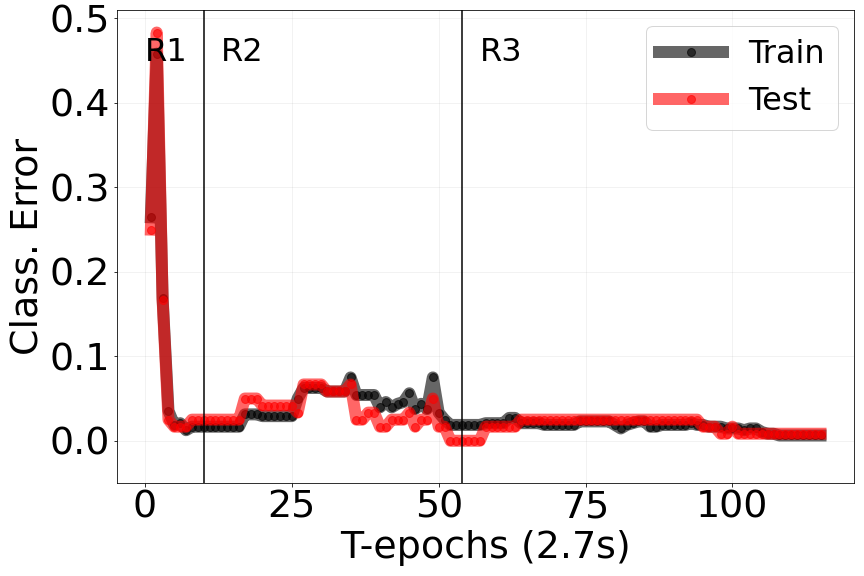

In [18]:
if clf.keepscore>1 and plot_curves:
    oPlot = FlowLayout()
    ax = clf.plot_curve('.', show = False, save = False)
    oPlot.add_plot(ax)
    oPlot.PassHtmlToCell()

## Show Domain

*** Plotting Domain ***



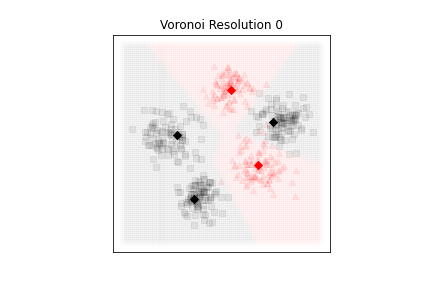
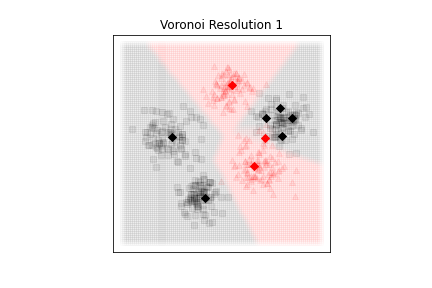
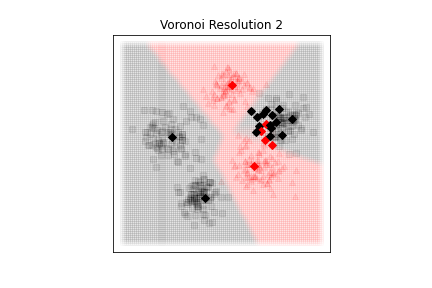

*** All Done ***


In [19]:
show_domain = True

if show_domain:
    print('*** Plotting Domain ***')
    if len(res)<2:
        oPlot = FlowLayout()
        for i in [1,3,7]:
            ax = demo_domain.show_instance(clf=clf, instance = i, res=res, plot_fig=False, save_fig = False)
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
    else:
        axs = demo_domain.show_resolutions(clf=clf, res=res, plot_fig=False, save_fig = False)
        oPlot = FlowLayout()
        for ax in axs:
            oPlot.add_plot(ax)
        oPlot.PassHtmlToCell()
        
print('*** All Done ***')

# Takeaways:

## [1] Reduction in time complexity $O(|C|^2 + |C| \log_{|C|} K) < O(K^2)$
- $|C|<<K$: number of children nodes 
- typically $|C|>2$, which implies $\log_{|C|} K<\log_{2} K$ ($|C|=2$ in binary trees)
- Compare 2.6s (Tree-Structured ODA) to ~100s (ODA)

## [2] Reduction in memory complexity
- Focus only on the boundaries of Bayes-Optimal Classifier 
- Compare K=22 (Tree-Structured ODA) to ~100 (ODA)